In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from collections import Counter

In [3]:
df = pd.read_csv(r"churn-bigml-80.csv")
df

,State,Account length,Area code,International_plan,Voicemailplan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [14]:
df.Churn=df.Churn.astype('category').cat.codes
df=df.drop('State',axis=1)
df.International_plan=df.International_plan.astype('category').cat.codes
df.Voicemailplan=df.Voicemailplan.astype('category').cat.codes

In [15]:
df

,Account length,Area code,International_plan,Voicemailplan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [37]:
#checking null values
dfresult=df.dropna()
print(dfresult)
df.isnull().sum()

      Account length  Area code  International_plan  Voicemailplan  \
0                128        415                   0              1   
1                107        415                   0              1   
2                137        415                   0              0   
3                 84        408                   1              0   
4                 75        415                   1              0   
...              ...        ...                 ...            ...   
2661              79        415                   0              0   
2662             192        415                   0              1   
2663              68        415                   0              0   
2664              28        510                   0              0   
2665              74        415                   0              1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        

Account length            0
Area code                 0
International_plan        0
Voicemailplan             0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [30]:
#checking duplicates
print(df.duplicated())
df=df.drop_duplicates()
df.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Length: 2666, dtype: bool


0

In [29]:
df.dtypes

Account length              int64
Area code                   int64
International_plan           int8
Voicemailplan                int8
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        int8
dtype: object

In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [17]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
def evaluate_knn(X_train, y_train, X_test, y_test, k_values, distance_metrics):
    results = {}
    for k in k_values:
        results[k] = {}
        for metric in distance_metrics:
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            cm = confusion_matrix(y_test, y_pred)
            
            precision_m = report['1']['precision']
            recall_m = report['1']['recall']
            f1_score_m = report['1']['f1-score']
      
            results[k][metric] = {
                'accuracy': acc,
                 'precision': precision_m,
                'recall': recall_m,
                'f1score': f1_score_m,
                'confusion_matrix': cm
            }
            
    return results

In [21]:
k_values = [3, 5, 7, 9, 11]
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

In [22]:
print("Evaluating KNN without PCA:")
results_no_pca = evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, k_values, distance_metrics)

Evaluating KNN without PCA:


In [23]:
for k, metrics_data in results_no_pca.items():
    for metric, result in metrics_data.items():
        print(f"K: {k}, Distance Metric: {metric}")
        print(f"  Accuracy: {result['accuracy']:.4f}")
        print(f"  Precision (Malignant): {result['precision']:.4f}")
        print(f"  Recall (Malignant): {result['recall']:.4f}")
        print(f"  F1-score (Malignant): {result['f1score']:.4f}")
        print("  Confusion Matrix:\n", result['confusion_matrix'])
        print("-" * 50)

K: 3, Distance Metric: euclidean
  Accuracy: 0.8839
  Precision (Malignant): 0.7073
  Recall (Malignant): 0.3671
  F1-score (Malignant): 0.4833
  Confusion Matrix:
 [[443  12]
 [ 50  29]]
--------------------------------------------------
K: 3, Distance Metric: manhattan
  Accuracy: 0.8801
  Precision (Malignant): 0.7027
  Recall (Malignant): 0.3291
  F1-score (Malignant): 0.4483
  Confusion Matrix:
 [[444  11]
 [ 53  26]]
--------------------------------------------------
K: 3, Distance Metric: minkowski
  Accuracy: 0.8839
  Precision (Malignant): 0.7073
  Recall (Malignant): 0.3671
  F1-score (Malignant): 0.4833
  Confusion Matrix:
 [[443  12]
 [ 50  29]]
--------------------------------------------------
K: 5, Distance Metric: euclidean
  Accuracy: 0.8876
  Precision (Malignant): 0.8276
  Recall (Malignant): 0.3038
  F1-score (Malignant): 0.4444
  Confusion Matrix:
 [[450   5]
 [ 55  24]]
--------------------------------------------------
K: 5, Distance Metric: manhattan
  Accuracy:

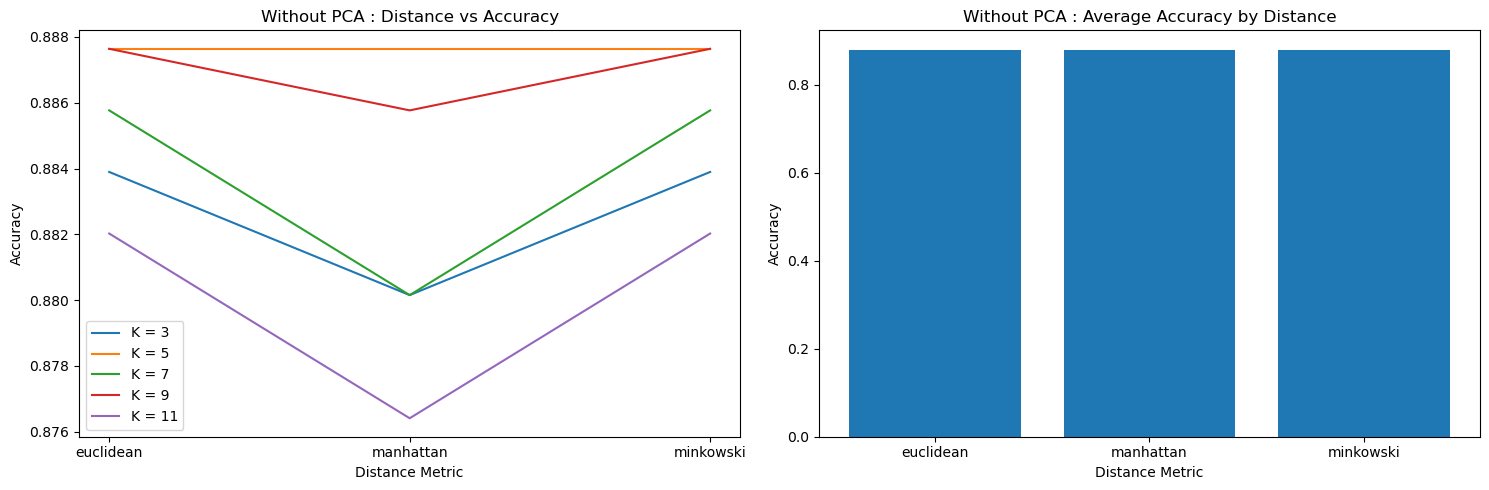

In [28]:
def visualize_results(results, title):
    
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    
    
    k_acc_data = {k: [res['accuracy'] for res in metrics.values()] for k,metrics in results.items()}
    k_values = list(k_acc_data.keys())
    
    for k in k_values:
        axes[0].plot(distance_metrics,k_acc_data[k], label=f'K = {k}')
    axes[0].set_xlabel('Distance Metric')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title(f'{title} : Distance vs Accuracy')
    axes[0].legend()

    
    dist_acc_data = {metric: [res['accuracy'] for res in metrics.values()] for k,metrics in results.items() for metric,res in metrics.items()}
    dist_acc_data_mean={}
    for k in distance_metrics:
      dist_acc_data_mean[k] = np.mean(dist_acc_data[k])
    distance_metrics_acc=list(dist_acc_data_mean.keys())
    accuracy_val=list(dist_acc_data_mean.values())
    
    axes[1].bar(distance_metrics_acc,accuracy_val)
    axes[1].set_xlabel('Distance Metric')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title(f'{title} : Average Accuracy by Distance')
    
    plt.tight_layout()
    plt.show()
    
visualize_results(results_no_pca, "Without PCA")

In [25]:
best_k_no_pca = 0
best_metric_no_pca = ''
best_accuracy_no_pca = 0

for k in results_no_pca:
    for metric in results_no_pca[k]:
        if results_no_pca[k][metric]['accuracy'] > best_accuracy_no_pca:
            best_accuracy_no_pca = results_no_pca[k][metric]['accuracy']
            best_k_no_pca = k
            best_metric_no_pca = metric

print(f"\nBest K without PCA: {best_k_no_pca}")
print(f"Best Distance Metric without PCA: {best_metric_no_pca}")
print(f"Best Accuracy without PCA: {best_accuracy_no_pca:.4f}")


Best K without PCA: 5
Best Distance Metric without PCA: euclidean
Best Accuracy without PCA: 0.8876


In [36]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply KNN with PCA and best k, best distance
knn_pca = KNeighborsClassifier(n_neighbors=best_k_no_pca, metric=best_metric_no_pca)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Best k: {best_k_no_pca}")
print(f"Best distance: {best_metric_no_pca}")
print(f"Accuracy without PCA: {best_accuracy_no_pca}")
print(f"Accuracy with PCA: {accuracy_pca}")


Best k: 5
Best distance: euclidean
Accuracy without PCA: 0.8876404494382022
Accuracy with PCA: 0.8558052434456929


C:\Users\Admin\AppData\Local\Temp\ipykernel_12852\2165343012.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(point[0], point[1], c=plt.cm.Set1(label / max(y_train)), edgecolor='k', s=20)


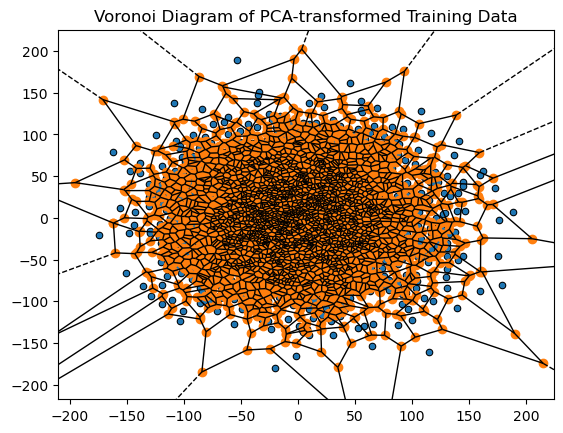

In [47]:
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(X_train_pca)

fig = voronoi_plot_2d(vor)
plt.title('Voronoi Diagram of PCA-transformed Training Data')

y_train = np.array(y_train) 
y_train_normalized = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_train_normalized = np.clip(y_train_normalized, 0, 1)  


for i, (point, label) in enumerate(zip(X_train_pca, y_labels)):
    plt.scatter(point[0], point[1], c=plt.cm.Set1(label / max(y_train)), edgecolor='k', s=20)

plt.show()